<div style="border:solid green 2px; padding: 20px">
<b>Привет, Адиль!</b>

Меня зовут Румянцева Екатерина, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Адиль, спасибо что выполнил такую объемную работу! В ходе проверки я отметила много положительных моментов, ты увидишь их в моих комментариях! Ты молодец!
    
Есть ряд моментов, которые нужно поправить. Я уверена - ты со всем справишься!

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 
    
Адиль, привет! Мои новые комментарии с пометкой v. 2.

# Проект A/B тестирования

## Описание проекта

Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.

Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

## Описание данных

#### Данные для первой части

Hypothesis.csv
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы

#### Данные для второй части

Orders.csv
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ

Visitors.csv
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Импорт данных и библиотек

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import math as mth
from scipy import stats as st
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()

In [2]:
try:
    hypothesis, orders, visitors = (pd.read_csv(r'E:\Yandex_Practikum\AB_test\hypothesis.csv'),
    pd.read_csv(r'E:\Yandex_Practikum\AB_test\orders.csv'),
    pd.read_csv(r'E:\Yandex_Practikum\AB_test\visitors.csv'))
except:
    hypothesis, orders, visitors = (pd.read_csv('/datasets/hypothesis.csv'),
    pd.read_csv('/datasets/orders.csv'),
    pd.read_csv('/datasets/visitors.csv'))

pd.options.display.max_colwidth = 150
display(hypothesis.head())
display(orders.head())
display(visitors.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 

Адиль, здорово, что используешь конструкцию `try - except`!
Также большой плюс, что вывел текст гипотез целиком.

### Проверим тип данных, дубликаты и пропуски

In [3]:
def pre_check(df):
    print('Типы данных:')
    df.info()
    print(' ')
    print('Дубликаты:', df.duplicated().sum())
    print('Пропуски:', df.isna().sum())

In [4]:
print(pre_check(visitors))

Типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
 
Дубликаты: 0
Пропуски: date        0
group       0
visitors    0
dtype: int64
None


In [5]:
print(pre_check(orders))

Типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
 
Дубликаты: 0
Пропуски: transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
None


In [6]:
print(pre_check(hypothesis))

Типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
 
Дубликаты: 0
Пропуски: Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64
None


<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Обрати внимание, ты используешь один и тот же код, только передаешь в него разные таблицы. В таких случаях удобно оборчивать такой код в функцию и вызывать функцию, передавая ей в качестве аргумента таблицу.

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> 
    
Адиль, перед началом работы над созданием таблицы с коммулятивными данными, я рекомендую тебе провести дополнительные исследования данных в файлах `orders` и `visitors`:
   - проверь сколько групп в А/В тесте;
   - какой период проведения теста;
   - какое количество покупателей в каждой группе (можем смотреть в таблице с заказами);
   - были ли пользователи, которые попали в каждую из групп теста.
    
**Опыт таких манипуляций с данными тебе пригодится в дальнейшем обучении**.
    

In [7]:
print(visitors['group'].unique()) # посмотрим количество групп в тесте

['A' 'B']


In [8]:
print(visitors['date'].min()) # посмотрим длительность теста
print(visitors['date'].max())

2019-08-01
2019-08-31


<div class="alert alert-info">
    
Тест длился один месяц.
    
</div>

In [9]:
print(orders.groupby('group')['visitorId'].nunique())

group
A    503
B    586
Name: visitorId, dtype: int64


<div class="alert alert-info">
    
В каждой группе примерно одинаковое количество пользователей. Разница статистически незначимая.
    
</div>

In [10]:
groups_ab = orders.pivot_table(index='visitorId', values='group', aggfunc='nunique')
groups_ab.reset_index()
groups_ab.query('group > 1').count()

group    58
dtype: int64

<div class="alert alert-info">
    
58 пользователей попали в обе группы. Учтем это при дальнейшем анализе.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v. 2 ✔️:</b> Хорошо!

### Часть 1. Приоритизация гипотез

In [11]:
hypothesis['ice_score'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)
display(hypothesis.sort_values(by='ice_score', ascending=False).head(10))

,Hypothesis,Reach,Impact,Confidence,Efforts,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


In [12]:
hypothesis['rice_score'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
display(hypothesis.sort_values(by='rice_score', ascending=False).head(10))

,Hypothesis,Reach,Impact,Confidence,Efforts,ice_score,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


<div class="alert alert-info">
    
- после применения фреймворка ICE наиболее приоритетными стали гипотезы 8,0 и 7
- после применения фреймворка RICE, показатель Reach(охват) изменил приоритетность. Теперь приоритетными стали гипотезы 7,2 и 0, а гипотеза 8 стала пятой по приоритетности.
    
Гипотеза 8 была самой приоритетной, но имеет очень малый охват. Т.к. за время проведения АВ-теста слишком мало пользователей будут праздновать свои именины.
    
С учетом охвата(Reach) самой приоритетной стала гипотеза 7, т.к. имеет наибольший охват - 10 баллов и высокий Impact - 7, при том же значении Efforts(стоимости проверки гипотезы) - 5
    
Гипотеза 0 в топе-3 в обоих расчетах за счет параметра Impact(степень влияния) - 10, а охват в 30% можно считать относительно полным, т.к. задача привлечь дополнительные 30% пользователей. Новые каналы привлечения имеют высокий Impact за счет таргетирования рекламы 
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Адиль, хороший анализ! Молодец!

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> 
    
Смотри, тут начинается исследование данных - как подготовка к анализу А/В теста. Я бы советовала выделить этот раздел заголовком.
    
Не выводи на экран вместе с графиками в одной ячейке таблицы. Лучше разделить этот код -  отдельно вывести таблицу отдельно график. Также в юпитере мы не используем print() при выводе таблиц.
    
По оформлению графиков - у всех графиков должны быть названия, а оси подписаны. Подписи сетки данных должны читаться. Попробуй увеличить размер графиков.
    
Для того чтобы не выводилась вот эта строчка `<matplotlib.legend.Legend at 0x24f79b4d820>` можно поставить `;` после `plt.legend()` или написать еще строку - `plt.show()`.
    


## Анализ результатов А/В-теста

In [13]:
# посмотрим стабильность кумулятивных метрик

datesGroups = orders[['date','group']].drop_duplicates() 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date': 'max', 'group': 'max', 'transactionId': 'nunique', 'visitorId': 'nunique', 'revenue': 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


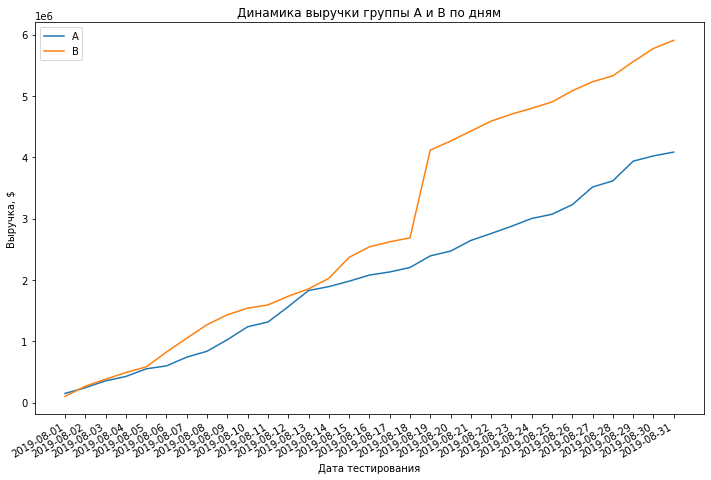

In [14]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
K = plt.figure() 
K.set_figwidth(12)
K.set_figheight(8)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.gcf().autofmt_xdate()
plt.ylabel('Выручка, $')
plt.xlabel('Дата тестирования')
plt.title('Динамика выручки группы А и В по дням')
plt.legend()
plt.show()

<div class="alert alert-info">
    
В середине теста группа В начала превосходить группу А по сумме выручки, вероятно присутствуют заказы с аномальными значениями. Проверим их в ходе дальнейшего анализа.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> По выводам согласна с тобой.

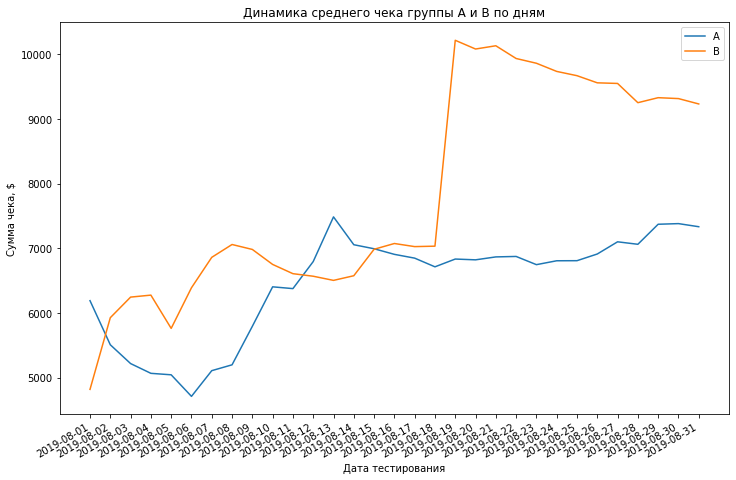

In [15]:
# для каждой группы построим графики кумулятивного среднего чека по дням

K = plt.figure() 
K.set_figwidth(12)
K.set_figheight(8)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.gcf().autofmt_xdate()
plt.ylabel('Сумма чека, $')
plt.xlabel('Дата тестирования')
plt.title('Динамика среднего чека группы А и В по дням')
plt.legend()
plt.show()

<div class="alert alert-info">
    
По динамике среднего чека также наблюдаются сильные колебания. В середине теста у группы В средний чек сильно возрастает.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, хорошо.

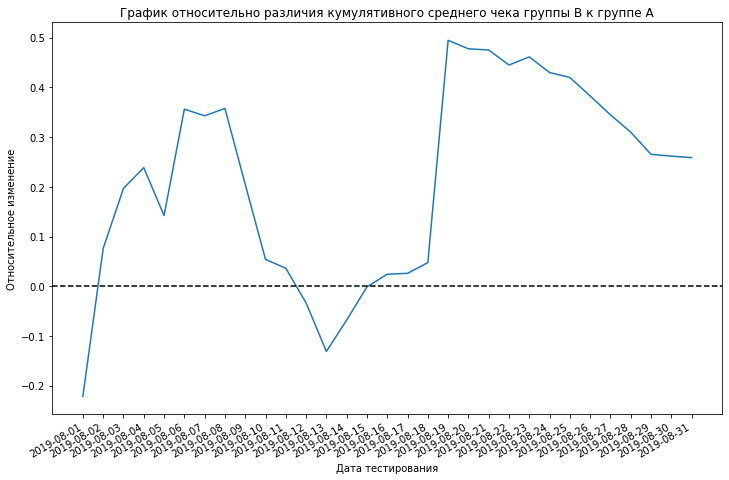

In [16]:
# построим график относительно различия кумулятивного среднего чека группы B к группе A

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
K = plt.figure() 
K.set_figwidth(12)
K.set_figheight(8)
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.gcf().autofmt_xdate()
plt.ylabel('Относительное изменение')
plt.xlabel('Дата тестирования')
plt.title('График относительно различия кумулятивного среднего чека группы B к группе A')
plt.show()

<div class="alert alert-info">
    
В некоторые даты наблюдаются значительные изменения различия средних чеков, видимо в эти дни были сделаны аномальные заказы.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, вполне вероятно

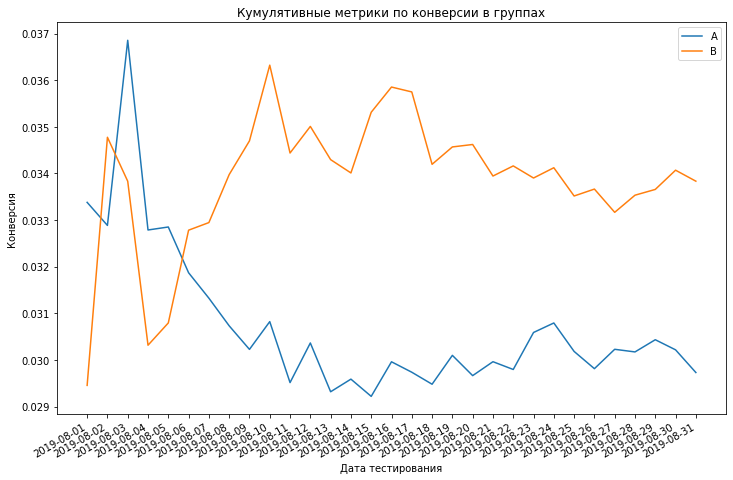

In [17]:
# посмотрим кумулятивные метрики по конверсии в группах

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors'] # добавим столбец с конверсией

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
K = plt.figure() 
K.set_figwidth(12)
K.set_figheight(8)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.gcf().autofmt_xdate()
plt.ylabel('Конверсия')
plt.xlabel('Дата тестирования')
plt.title('Кумулятивные метрики по конверсии в группах')
plt.legend()
plt.show()

<div class="alert alert-info">
    
У группы В после первой недели теста конверсия становится больше чем у группы А и превосходит до конца теста.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошо.

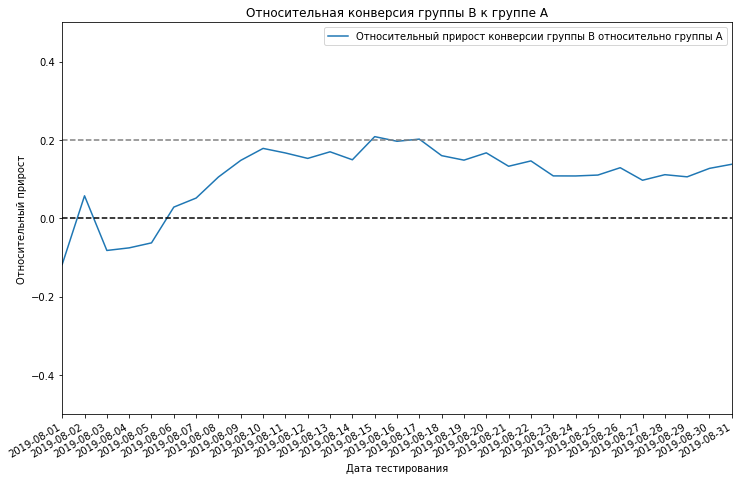

In [18]:
# посмотрим относительную конверсию группы В к группе А

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
K = plt.figure() 
K.set_figwidth(12)
K.set_figheight(8)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y= 0.2, color='grey', linestyle='--')
plt.axis([mergedCumulativeConversions['date'].min(), mergedCumulativeConversions['date'].max(), -0.5, 0.5])
plt.gcf().autofmt_xdate()
plt.ylabel('Относительный прирост')
plt.xlabel('Дата тестирования')
plt.title('Относительная конверсия группы В к группе А')
plt.legend()
plt.show()

<div class="alert alert-info">
    
Относительный прирост конверсии группы В к группе А в середине теста достигает 20%, а к концу теста устанавливается на уровне 10-12%.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 
    
Отлично. Молодец что прочертил вторую `axhline`.

### Проанализируем выбросы и всплески (крайние значения данных)

In [19]:
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})) # количество заказов на одного пользователя
ordersByUsers.columns = ['userId', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


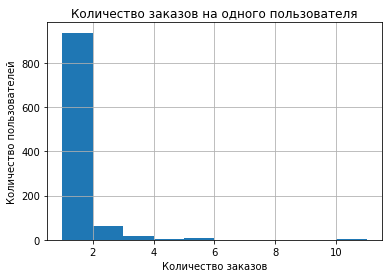

In [20]:
ordersByUsers['orders'].hist() # смотрим распределение по гистограмме
plt.ylabel('Количество пользователей')
plt.xlabel('Количество заказов')
plt.title('Количество заказов на одного пользователя')
plt.show()

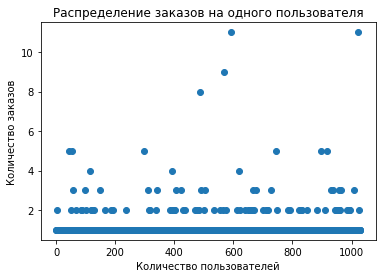

In [21]:
x_orders = pd.Series(range(0, len(ordersByUsers))) # посмотрим точечное распределение
plt.scatter(x_orders, ordersByUsers['orders'])
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.title('Распределение заказов на одного пользователя')
plt.show()

<div class="alert alert-info">
    
По графикам видно что большинство пользователей делают 1-2 заказа. Посмотрим 95 и 99 перцентили по заказам.
    
</div>

In [22]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


<div class="alert alert-info">
    
Не больше 5% пользователей делали более 2 заказов, и не более 1% - больше 4-х.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 
    
По расчетам все здорово! Не забудь про оформление графиков.

In [23]:
display(orders.sort_values(by='revenue', ascending=False).head(10)) # смотрим распределение по сумме выручки


,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


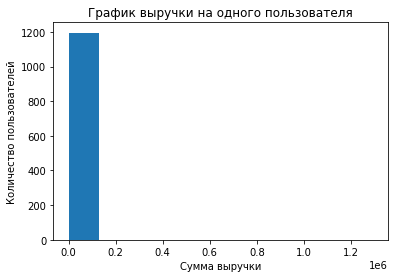

In [24]:
plt.hist(orders['revenue']); # смотрим распределение по гистограмме
plt.ylabel('Количество пользователей')
plt.xlabel('Сумма выручки')
plt.title('График выручки на одного пользователя')
plt.show()

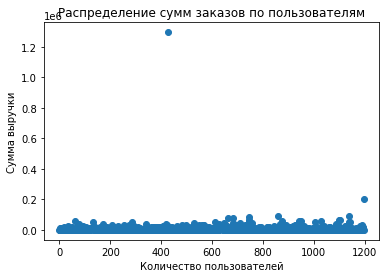

In [25]:
x_revenue = pd.Series(range(0, len(orders['revenue']))) # смотрим распределение по диаграмме рассеяния
plt.scatter(x_revenue, orders['revenue'])
plt.ylabel('Сумма выручки')
plt.xlabel('Количество пользователей')
plt.title('Распределение сумм заказов по пользователям')
plt.show()

<div class="alert alert-info">
    
По графикам видно что присутствуют аномальные значения по суммам заказа. Посмотрим 95 и 99 перцентили по суммам заказов.
    
</div>

In [26]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


<div class="alert alert-info">
    
Не больше 5% пользователей делали заказы на сумму более 28 тысяч, и не более 1% - больше 58 тысяч.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 
    
Верно!

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> 
    
Адиль, весь код выше не нужен нам для анализа A/Б теста. Мы можем напрямую обращаться к нашим файлам `orders` и `visitors`.
    
    
По оформлению стат тестов:
- Обязательно заранее прописываем какой критерий будем использовать и почему именно его,
- Задаем уровень значимости (альфа)
- Формулируем гипотезы для каждого теста.
- все выводимые значения подписываем.


In [27]:
# разделим пользователей на группы А и В, и посчитаем статистическую значимость различий по конверсии и среднему чеку, 
# как по "сырым", так и по очищенным данным

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

# в переменных sampleA и sampleB, пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули.

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

<div class="alert alert-danger">
<b>Комментарий ревьюера v. 2 ❌:</b> 
 
Тут вместо `orders['visitorId'].nunique()` нужно обращаться к файлу visitors, например, для группы В вот так - ` visitors[visitors['group']=='B']['visitors'].sum()`, так как в файле заказов только покупатели. Исправь пожалуйста, тоже самое нужно поправить в очищенных данных.

### Проверим гипотезы

#### В последующих проверках гипотез применим непараметрический тест Манна-Уитни и вычислим относительное различие в среднем между группами, т.к. имеем 2 массива данных, разделенных по группе и по каждому дню тестирования.

- нулевая гипотеза: средняя конверсия пользователей группы А и В равны
- альтернативная гипотеза: средняя конверсия пользователей группы А и В различаются

In [28]:
alpha = .05 # критический уровень статистической значимости

results = st.mannwhitneyu(sampleA, sampleB)

print("p-значение:{0:.5f}".format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:0.01679
Отвергаем нулевую гипотезу


In [29]:
# относительный прирост средней конверсии группы В к группе А

pvalue = sampleB.mean() / sampleA.mean() - 1

print("p-значение:{0:.3f}".format(pvalue))

p-значение:0.138


<div class="alert alert-success">
<b>Комментарий ревьюера v. 3 ✔️:</b> Хорошо!

<div class="alert alert-danger">
<b>Комментарий ревьюера v. 2 ❌:</b> Выше, это просто расчет прироста одной конверсии над другой. Это не статистическая проверка, тут не нужны гипотезы.

<div class="alert alert-info">
    
Статистической значимость различия в среднем количестве заказов присутствует, значение p-value меньше 0,05. А относительный прирост среднего группы В относительно группы А равен 13,8%  
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> По выводам - согласна с тобой.

- нулевая гипотеза: средний чек пользователей группы А и В равны
- альтернативная гипотеза: средний чек пользователей группы А и В различаются

<div class="alert alert-danger">
<b>Комментарий ревьюера v. 2 ❌:</b>  Тут мы проверяем средний чек, исправь гипотезы пожалуйста. Также нужно исправить гипотезы по очищенным данным.

<div class="alert alert-success">
<b>Комментарий ревьюера v. 3 ✔️:</b> Принято!

In [30]:
# посчитаем статистическую значимость по средним чекам
alpha = .05 # критический уровень статистической значимости

results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print("p-значение:{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:0.729
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-danger">
<b>Комментарий ревьюера v. 2 ❌:</b> Тоже самое, тут гипотезы не уместны. Удали их везде, где находишь прирост показателей, пожалуйста.

In [31]:
# относительный прирост среднего группы В к группе А

p_value = orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean() - 1

print("p-значение:{0:.3f}".format(p_value))

p-значение:0.259


<div class="alert alert-info">
    
По "сырым данным" статистической значимости различия в среднем чеке отсутствует, значение p-value много больше 0,05. А относительный различие среднего чека группы В относительно группы А равен 25,9%.
    
</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Почему основные аномалии в количестве заказов на пользователя?

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> По коду ниже:
        
- не нужно писать границы аномалий в виде ранее полученых цифр руками в код. Вместо цифр, укажи код расчета соответствующего перцентиля.
    
- тут также стоит отказаться от ссылок на файл `data`
    
- нужно привести в порядок оформление стат тестов.


### Проверим гипотезы по "очищенным" данным

In [32]:
# подготовим очищенные от аномалий данные, создадим список с пользователяти, сделавшими аномальные заказы

usersWithManyOrders = ordersByUsers[ordersByUsers['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId']

usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# очистим данные от аномалий и посчитаем статистическую значимость количества заказов по "очищенным" данным

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

<div class="alert alert-danger">
<b>Комментарий ревьюера v. 2 ❌:</b>  Писала выше, тут нужно поправить код в формировании массивов

- нулевая гипотеза: средняя конверсия пользователей группы А и В по "очищенным" данным равны
- альтернативная гипотеза: средняя конверсия пользователей группы А и В по "очищенным" данным различаются

In [33]:
alpha = .05 # критический уровень статистической значимости

p_value = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

print("p-значение:{0:.5f}".format(p_value))

if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:0.01217
Отвергаем нулевую гипотезу


In [34]:
# относительный прирост средней конверсии группы В к группе А

p_value = sampleBFiltered.mean()/sampleAFiltered.mean()-1

print("p-значение:{0:.5f}".format(p_value))

p-значение:0.17569


<div class="alert alert-info">
    
Статистическая значимость различия аналогична "сырым" данным. Группа В опережает группу А.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> По выводам - верно.

- нулевая гипотеза: средний чек пользователей группы А и В по "очищенным" данным равны
- альтернативная гипотеза: средний чек пользователей группы А и В по "очищенным" данным различаются

In [35]:
# посчитаем статистическую значимость различия средних чеков

alpha = .05 # критический уровень статистической значимости

p_value = st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]

print("p-значение:{0:.5f}".format(p_value))

if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:0.75287
Не получилось отвергнуть нулевую гипотезу


In [36]:
# относительный прирост среднего группы В к группе А

pvalue = (
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )

print("p-значение:{0:.3f}".format(pvalue))

p-значение:-0.022


<div class="alert alert-info">
    
Статистическая значимость различия среднего чека не изменилась относительно "сырых" данных, а прирост среднего группы В к группе А исчез, и даже снизился на 2%
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да. согласна с тобой.

### Выводы из А/В теста

- после первой недели теста у группы В наблюдается опережение и прирост конверсии относительно группы А, как по "сырым", так и по "очищенным" данным
- по сырым данным нет статистически значимого различия по среднему чеку между группами. Даже после удаления аномалий статистически значимое различие отсутствует
- график различия конверсии между группами говорит, что результаты группы B лучше группы A: имеют тенденцию к росту, к концу теста прирост снизился вдвое относительно максимального, и зафиксировался около среднего значения
- график различия среднего чека сильно колеблется: он указал на присутствие аномалий. Но сделать из этого графика определённые выводы нельзя

### Решение по результатам теста: остановить тест, зафиксировать победу группы В. 

- Показатели последней по выручке и конверсии превосходят группу А и не проявляют тенденции к снижению.
- Показатели среднего чека группы В по "сырым" данным также выше, и с группой А сравниваются только по "очищенным" данным.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошо. Согласна с тобой!

<div style="border:solid green 2px; padding: 20px">

**Общий вывод по проекту**
    

Адиль, спасибо за твой проект! Проделана большая работа, ты молодец! 

На что стоит обратить внимание🤓:

- произвести дополнительные исследования данных
- исправить недочеты в оформлении графиков
- проработать над оформлением стат. тестов
- заменить константы границ аномалий на код расчета перцентиля
    

Остальные рекомендации ты найдешь в моих комментариях!

Желаю удачи и жду твой проект на повторное ревью!😉

<div style="border:solid green 2px; padding: 20px">

**Общий вывод по проекту**

Осталось немного:
    
- откорректировать код для формирования массивов стат теста конверсии по сырым и по очищенным данным,
- откорретировать формулировку гипотез, удалить лишние гипотезы.

Желаю удачи и жду твой проект на повторное ревью!😉

<div style="border:solid green 2px; padding: 20px">

**Общий вывод по проекту**

Адиль, желаю успехов в дальнейшем обучении! Всего хорошего!